In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [2]:
data = pd.read_csv("/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv")

In [3]:
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.describe()


,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,274093.0,274093.0,274093.0,274093.0,274093.0,274093.0,274093.000000,274093.000000,274093.000000,274093.000000,...,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.000011,0.001043,0.001518,...,0.002638,0.001562,0.001131,0.000894,0.000489,0.000317,0.000204,0.000033,0.000033,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.001910,0.004271,0.475743,0.494410,...,0.320080,0.179093,0.150590,0.189578,0.083345,0.067396,0.053345,0.012813,0.012813,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2.000000,248.000000,245.000000,...,103.000000,59.000000,41.000000,88.000000,21.000000,20.000000,19.000000,6.000000,6.000000,0.0


## **Lets process the data**

In [5]:
images = data.drop({'labels','names'},axis=1)
B = data[['labels']]

The code below converts categorical labels into numerical labels using the LabelEncoder class from scikit-learn. The fit_transform method of LabelEncoder is applied to the 'labels' column of a pandas DataFrame to transform the categorical labels into numerical labels. The np.unique function is used to find the unique numerical labels.

In [6]:
from sklearn.preprocessing import LabelEncoder
#label processing
le = LabelEncoder()
labels = le.fit_transform(data['labels'].values.ravel())
np.unique(labels)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93])

## **Let's see the sample dataset**


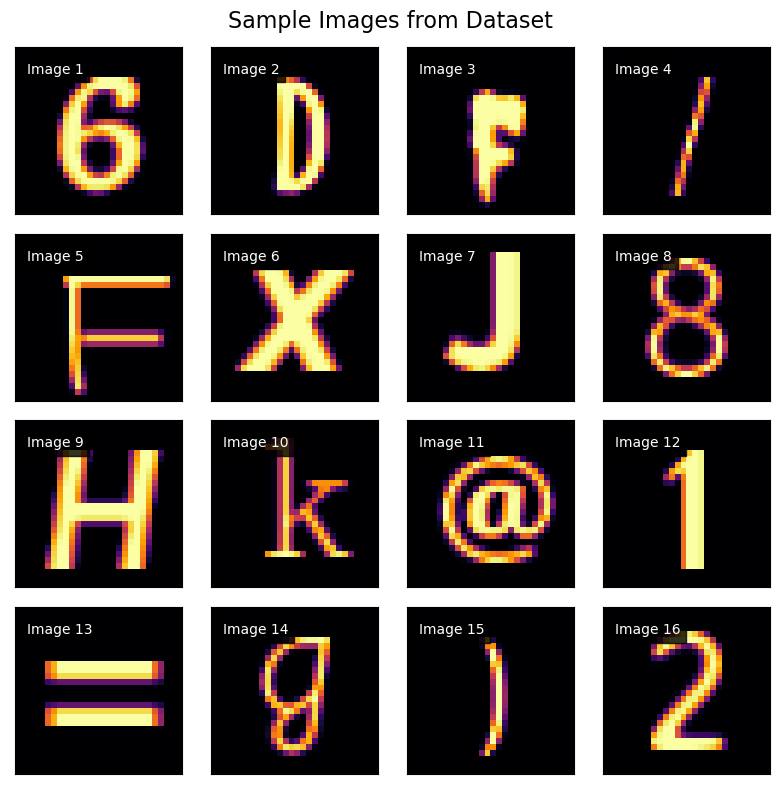

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 4, figsize=(8, 8))
fig.suptitle('Sample Images from Dataset', fontsize=16)

for i, ax in enumerate(axs.flatten()):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(images.iloc[i].values.reshape(28, 28), cmap='inferno')
    ax.text(1.5, 4, f'Image {i+1}', fontsize=10, color='white', bbox=dict(facecolor='black', alpha=0.8))
    
plt.tight_layout()
plt.show()


**Lets randomly visualize the image samples**

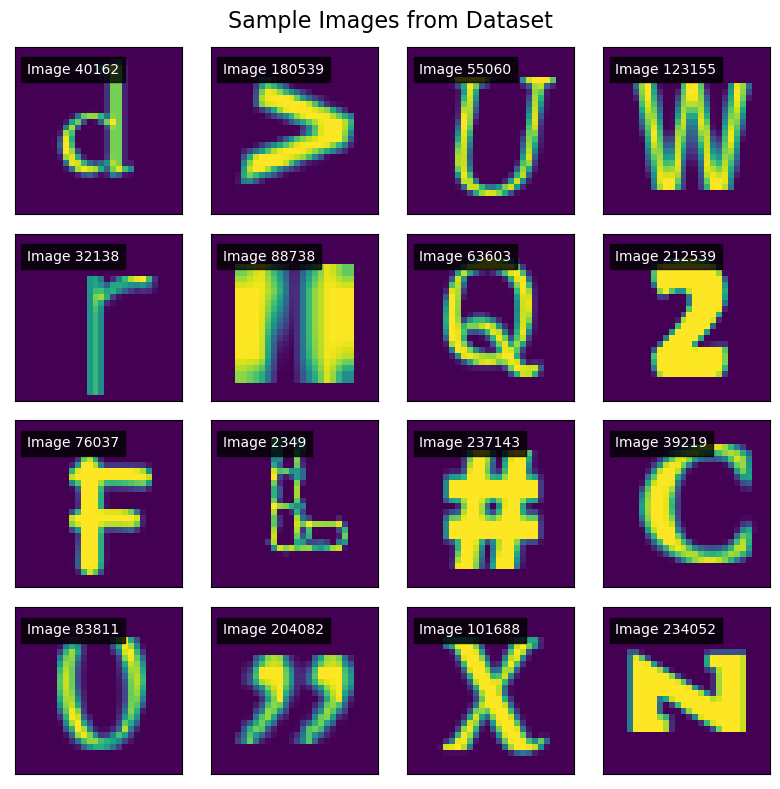

In [8]:
import random

images = data.drop({'labels','names'},axis=1)

fig, axs = plt.subplots(4, 4, figsize=(8, 8))
fig.suptitle('Sample Images from Dataset', fontsize=16)

for i, ax in enumerate(axs.flatten()):
    ax.set_xticks([])
    ax.set_yticks([])
    index = random.randint(0, len(images)-1)
    ax.imshow(images.iloc[index].values.reshape(28, 28), cmap='viridis')
    ax.text(1.5, 4, f'Image {index+1}', fontsize=10, color='white', bbox=dict(facecolor='black', alpha=0.8))

plt.tight_layout()
plt.show()


## **lets split the data into training and testing set**

In [9]:
image_data = data.iloc[:,2:].values
image_data.shape

(274093, 784)

The code below uses the train_test_split function from the sklearn.model_selection module to split the image_data and labels into a training set and a testing set. The training set contains 80% of the data and the testing set contains 20% of the data. The random_state parameter ensures that the same split is generated each time the code is run. The function returns four arrays, representing the training and testing sets of images and their corresponding labels, and their dimensions are printed at the end.

In [10]:
from sklearn.model_selection import train_test_split

train_img, test_img, train_label, test_label = train_test_split(image_data, labels, test_size=0.2, random_state=42)

train_img.shape, train_label.shape, test_img.shape, test_label.shape

((219274, 784), (219274,), (54819, 784), (54819,))

In [11]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

def create_cnn_model(input_shape, num_classes):
    cnnModel = tf.keras.Sequential([
        layers.Reshape((28,28,1), input_shape=input_shape),
        layers.Rescaling(1./255),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes)
    ])

    optimizer = Adam(learning_rate=1e-4)
    cnnModel.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return cnnModel


**Explanation of the code:**
This code defines a function called create_cnn_model that returns a CNN model for image classification using the Keras API of TensorFlow. The model consists of several layers including Conv2D, MaxPooling2D, and Dense layers, which are stacked on top of each other using the Sequential API. The model is compiled using the Adam optimizer and SparseCategoricalCrossentropy loss function. The create_cnn_model function takes two inputs: input_shape and num_classes, which define the shape of the input images and the number of classes in the classification task, respectively.

## **Let's see the model structure**

This code imports the plot_model function from the vis_utils module of Keras. It also creates a CNN model using the create_cnn_model function that takes the input shape (28, 28, 1) and the number of classes as arguments. The len(np.unique(labels)) part calculates the number of unique classes in the data.

Then, the plot_model function is called to visualize the model architecture. The plot_model function generates a visualization of the model and saves it to the model_plot.png file. The show_shapes and show_layer_names parameters are set to True to display the shapes of the input and output tensors for each layer and the names of the layers, respectively. The resulting visualization can be used to better understand the architecture of the CNN model.

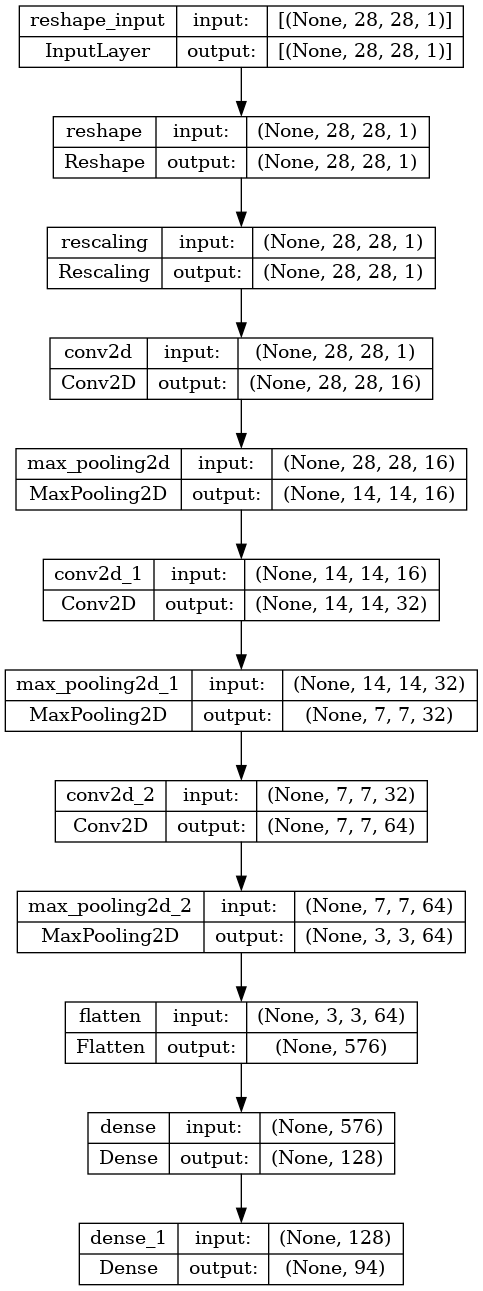

In [12]:
from keras.utils.vis_utils import plot_model

# create the model
cnnModel = create_cnn_model((28, 28, 1), len(np.unique(labels)))

# plot the model architecture
plot_model(cnnModel, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


The code below  prepares the data for a CNN model and trains the model. It sets the number of epochs, batch size, and number of classes. It also reshapes the input data to the required format, creates a CNN model using create_cnn_model function, and trains the model using the fit method with training and validation data. Finally, it stores the training history in the history variable for further analysis.

**The important parts of this code are:**
Setting the number of epochs, batch size, and number of classes.
Reshaping the input data to the required format for the CNN model.
Creating the CNN model using create_cnn_model function.
Training the model using the fit method with training and validation data.
Storing the training history in the history variable for further analysis.

In [13]:

num_classes = len(np.unique(train_label))

epochs = 40
batch_size = 64

# reshape the input data
train_img = train_img.reshape(-1, 28, 28, 1)
test_img = test_img.reshape(-1, 28, 28, 1)

cnnModel = create_cnn_model(input_shape=(28, 28, 1), num_classes=num_classes)

history = cnnModel.fit(train_img, train_label, validation_data=(test_img, test_label), epochs=epochs, batch_size=batch_size)


Epoch 1/40
3427/3427 [==============================] - 109s 32ms/step - loss: 1.3539 - accuracy: 0.6726 - val_loss: 0.7376 - val_accuracy: 0.8089
Epoch 2/40
3427/3427 [==============================] - 106s 31ms/step - loss: 0.6346 - accuracy: 0.8269 - val_loss: 0.5750 - val_accuracy: 0.8426
Epoch 3/40
3427/3427 [==============================] - 106s 31ms/step - loss: 0.5235 - accuracy: 0.8503 - val_loss: 0.4924 - val_accuracy: 0.8584
Epoch 4/40
3427/3427 [==============================] - 108s 31ms/step - loss: 0.4599 - accuracy: 0.8650 - val_loss: 0.4523 - val_accuracy: 0.8697
Epoch 5/40
3427/3427 [==============================] - 111s 32ms/step - loss: 0.4178 - accuracy: 0.8744 - val_loss: 0.4240 - val_accuracy: 0.8713
Epoch 6/40
3427/3427 [==============================] - 108s 31ms/step - loss: 0.3869 - accuracy: 0.8827 - val_loss: 0.4045 - val_accuracy: 0.8790
Epoch 7/40
3427/3427 [==============================] - 112s 33ms/step - loss: 0.3625 - accuracy: 0.8889 - val_loss: 0

**Output Explanation:**

During the first epoch, the model achieved a training accuracy of 67.26% and a validation accuracy of 80.89%, with a training loss of 1.3539 and a validation loss of 0.7137. Over the course of the 40 epochs, the accuracy on the validation set steadily increased, reaching a final value of 94.51%. Meanwhile, the validation loss steadily decreased, indicating that the model was improving over time.

## **Plots**

This code plots the accuracy and loss curves of the trained model over the epochs. It extracts the accuracy, validation accuracy, loss, and validation loss from the history object. It then creates two subplots using the plt.subplots function, one for the accuracy and the other for the loss. In each subplot, it plots the training and validation curves against the number of epochs. It also adds axis labels, legends, and titles to the plots. Finally, it shows the plots using the plt.show() function. The resulting plot gives an insight into how well the model has performed during the training process.

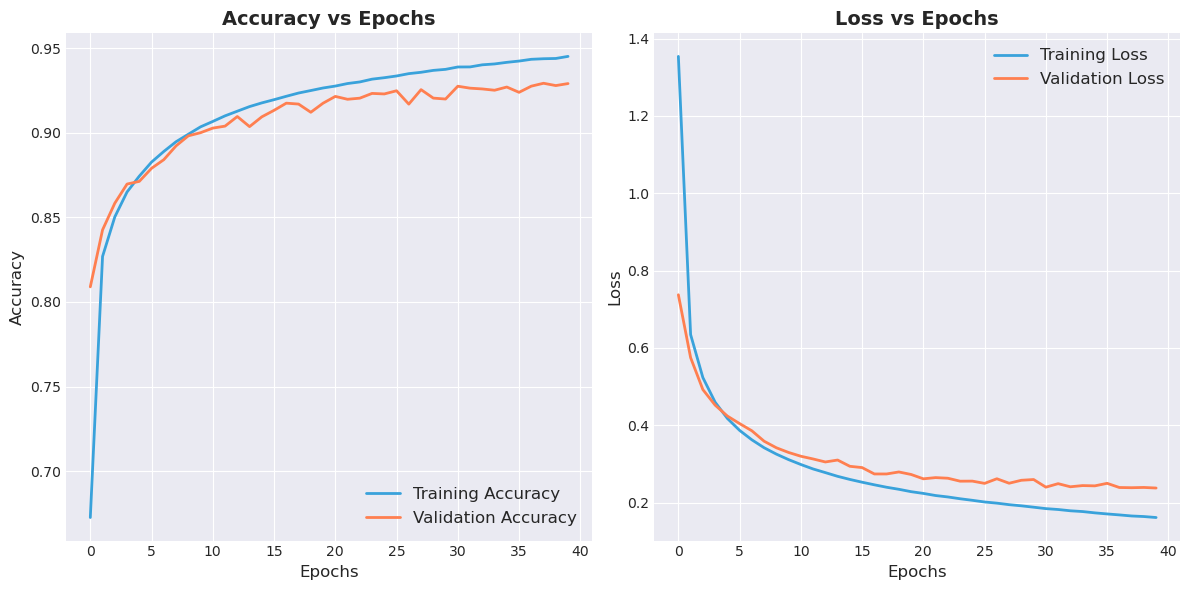

In [14]:
epochs = 40
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.style.use('seaborn-darkgrid')

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', linewidth=2, color='#39A2DB')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', linewidth=2, color='#FF7F50')
plt.legend(loc='lower right', fontsize=12)
plt.title('Accuracy vs Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', linewidth=2, color='#39A2DB')
plt.plot(epochs_range, val_loss, label='Validation Loss', linewidth=2, color='#FF7F50')
plt.legend(loc='upper right', fontsize=12)
plt.title('Loss vs Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)

plt.tight_layout()
plt.show()


# **Conclusion**
In conclusion, the performance of the simple CNN model is quite impressive as it achieved a test accuracy of 94.58%. The fact that the validation loss did not increase with the increase in epochs indicates that the model did not suffer from overfitting, and the chosen epoch time is optimal.


# **References**

https://www.kaggle.com/code/zeenwang7/91-27-tmnist

https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939

# **License**

Copyright (C) 2023 Pramita Dileep Sandhyan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.